In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import torch
#import torch.nn as nn
#from torch.autograd import Variable
#from sklearn.preprocessing import MinMaxScaler

In [10]:
#loss = nn.CrossEntropyLoss()

#input = torch.randn(3, 5, requires_grad=True)
#target = torch.randn(3, 5).softmax(dim=1)
#output = loss(input, target)

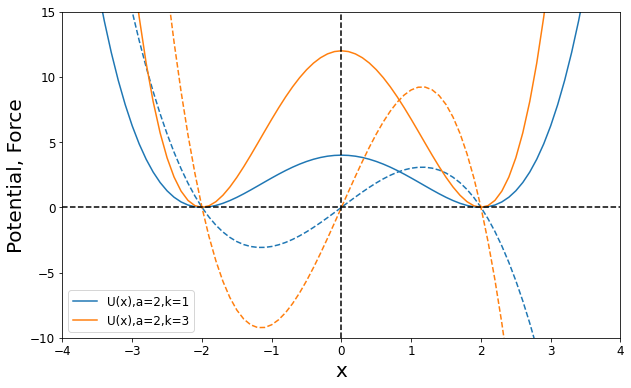

In [11]:
## Create a function to return the potential energy and force
def function_double_well_energy_force(x,a=2,k=1):
    # x is a numpy array
    energy = 0.25*k*((x-a)**2) * ((x+a)**2)
    force = -k*x*(x-a)*(x+a)
    return energy, force




# This function will plot the energy and the force
def plot_energy_force(function,xmin=-4.0,xmax=4.0,spacing=0.1,a=2,k=1,):
    x_points = np.arange(xmin, xmax+spacing,spacing)
    energy,force = function(x_points,a,k)
    label = 'U(x)'
    label = label+','+'%s=%s,%s=%s'%("a",str(a),"k", str(k))
    p = ax.plot(x_points, energy, label=label)
    ax.plot(x_points, force, label='', color=p[0].get_color(), linestyle='--')
    ax.legend(loc=0)
    
    
fig, ax = plt.subplots() 
plt.rcParams["figure.figsize"] = (10,6)
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIG_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIG_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_energy_force(function_double_well_energy_force,k=1,a=2)
plot_energy_force(function_double_well_energy_force,k=3,a=2)
plt.axhline(0,linestyle='--',color='black')
plt.axvline(0,linestyle='--',color='black')
ax.set_ylim(-10, 15)
ax.set_xlim(-4, 4)
ax.set_xlabel("x")
ax.set_ylabel("Potential, Force")
plt.savefig("double_well_energy_force"+".png", dpi=300)

In [12]:
#this is step A
def position_update(x,v,dt):
    x_new = x + v*dt/2.
    return x_new


#this is step B
def velocity_update(v,F,dt):
    v_new = v + F*dt/2.
    return v_new

def random_velocity_update(v,gamma,kBT,dt):
    R = np.random.normal()
    c1 = np.exp(-gamma*dt)
    c2 = np.sqrt(1-c1*c1)*np.sqrt(kBT)
    v_new = c1*v + R*c2
    return v_new

def baoab(potential, max_time, dt, gamma, kBT, initial_position, initial_velocity,
                                        save_frequency, a,k ):
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    positions = []
    velocities = []
    total_energies = []
    save_times = []
    
    while(t<max_time):
        
        # B
        potential_energy, force = potential(x,a,k)
        v = velocity_update(v,force,dt)
        
        #A
        x = position_update(x,v,dt)

        #O
        v = random_velocity_update(v,gamma,kBT,dt)
        
        #A
        x = position_update(x,v,dt)
        
        # B
        potential_energy, force = potential(x,a,k)
        v = velocity_update(v,force,dt)
        
        if step_number%save_frequency == 0 and step_number>0:
            e_total = .5*v*v + potential_energy

            positions.append(x)
            velocities.append(v)
            total_energies.append(e_total)
            save_times.append(t)
        
        t = t+dt
        step_number = step_number + 1
    
    return save_times, positions, velocities, total_energies   

In [13]:
my_k = 1

#CHANGE THESE
my_kBT = 10.0
my_a = 3.0

#plot_energy_force(function_double_well_energy_force, xmin=-4,xmax=+4, k=my_k, a=my_a)
#plt.ylim(-10,10)
#plt.figure()


my_initial_position = my_a
my_initial_velocity = 1
my_save_frequency = 3

my_gamma = 0.1
my_dt = 0.05
my_max_time = 10000

times, positions, velocities, total_energies = baoab(function_double_well_energy_force, 
                                                                            my_max_time, my_dt, my_gamma, my_kBT,\
                                                                            my_initial_position, my_initial_velocity,\
                                                                            my_save_frequency, k=my_k, a=my_a)

zip_positions = zip(times, positions)
list_times_positions = list(zip_positions)
f = open("position_double_well.dat", "w")

for line in list_times_positions:
    for value in line:
        f.write(str(value)+"    ")
    f.write ("\n")

# histogramming the results

def bin_centers(bin_edges):
    return (bin_edges[1:]+bin_edges[:-1])/2.
fig, ax = plt.subplots() 
plt.rcParams["figure.figsize"] = (10,6)
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIG_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIG_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

dist_hist, dist_bin_edges = np.histogram(positions,bins=50,density=True)
vel_hist, vel_bin_edges = np.histogram(velocities,bins=50,density=True)

ax.plot(bin_centers(dist_bin_edges), dist_hist,marker='o',label='P(x)',linestyle='')